In [1]:
from sklearn.datasets import load_iris
import numpy as np

In [2]:
iris_data = load_iris()

In [3]:
index = range(100)

In [4]:
D = iris_data.data[index,:]
T = iris_data.target[index]

In [5]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X=D, y=T)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
pred_prob = lr_model.predict_proba(X=D)

In [7]:
threshold_vals = np.linspace(0.0,0.99,num=20)

In [8]:
from sklearn.metrics import auc, roc_curve, confusion_matrix
tpr = []
fpr = []
for th in threshold_vals:
    y_cap = np.where(pred_prob[:,0]<th, 1,0)
    cm = confusion_matrix(y_true=T, y_pred=y_cap)
    #print(cm)
    tpr.append(cm[1,1]/sum(cm[1,:]))
    fpr.append(cm[0,1]/sum(cm[0,:]))

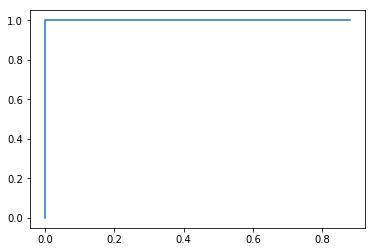

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr, tpr)

In [10]:
tpr, fpr, th = roc_curve(T, pred_prob[:,0])

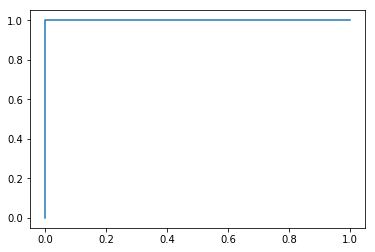

In [11]:
plt.plot(fpr, tpr)